# Total power consumption forecasting of all AC together, This gives the overall power consumption of thte hotel AC's.

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv(r'C:\Users\navee\Desktop\final_data.csv')

In [9]:
df.drop(columns=['Unnamed: 0','max_temp','min_temp'],inplace=True)
df['Time']=pd.to_datetime(df['Time'])
df['Total']=df.eval('AC1+AC2+AC3+AC4+AC5+AC6+AC7+AC8+AC9+AC10+AC11+AC12+AC13+AC14+AC15+AC16+AC17+AC18')

In [10]:
df.head()

,Time,AC1,AC2,AC3,AC4,AC5,AC6,AC7,AC8,AC9,...,AC11,AC12,AC13,AC14,AC15,AC16,AC17,AC18,avg_temp,Total
0,2019-08-01 00:00:00,7.518632,8.788315,0.0,0.0,2.617045,4.079041,2.782276,4.624447,5.222060,...,1.585072,0.560373,3.142941,2.749470,5.417774,4.113460,3.305072,6.735981,55,65.393197
1,2019-08-01 00:02:00,7.426114,8.940615,0.0,0.0,2.581625,3.781231,2.529366,5.057423,5.349465,...,2.168184,1.818730,3.085110,2.720484,3.302422,3.986483,3.220588,6.379500,55,64.762056
2,2019-08-01 00:04:00,7.052986,9.161103,0.0,0.0,2.592095,3.800127,2.332304,6.322521,3.995392,...,3.345624,2.310409,3.132799,2.676861,3.539026,3.797881,3.131560,6.363475,55,65.791277
3,2019-08-01 00:06:00,6.665446,9.065626,0.0,0.0,2.575639,3.772891,2.596200,5.805132,3.553778,...,2.737645,2.510972,3.090007,2.666604,4.607439,3.062610,3.063953,6.127366,55,63.779666
4,2019-08-01 00:08:00,6.674838,9.096130,0.0,0.0,2.021472,3.155697,2.845417,6.315060,3.042244,...,2.452500,2.171791,3.097202,2.710572,5.332696,2.640150,2.864680,5.662474,55,61.997570


In [15]:
df1=df[['Time','avg_temp','Total']]

In [16]:
df1.head()

,Time,avg_temp,Total
0,2019-08-01 00:00:00,55,65.393197
1,2019-08-01 00:02:00,55,64.762056
2,2019-08-01 00:04:00,55,65.791277
3,2019-08-01 00:06:00,55,63.779666
4,2019-08-01 00:08:00,55,61.997570


In [17]:
df2=df1.reset_index()['Total']

In [18]:
df2.head()

0    65.393197
1    64.762056
2    65.791277
3    63.779666
4    61.997570
Name: Total, dtype: float64

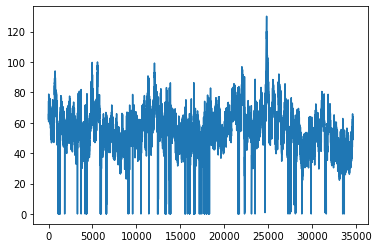

In [19]:
import matplotlib.pyplot as plt
plt.plot(df2)

#### from the plot we can generate the conclusion that the consumption of power is fairly displaying a pattern, with some spikes throughout the dataset.

In [20]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df2=scaler.fit_transform(np.array(df2).reshape(-1,1))

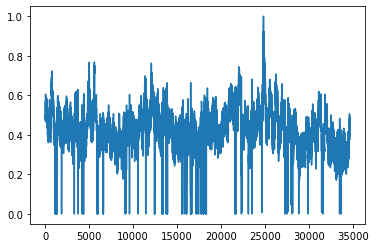

In [22]:
import matplotlib.pyplot as plt
plt.plot(df2)

In [23]:
training_size=int(len(df2)*0.65)
test_size=len(df2)-training_size
train_data,test_data=df2[0:training_size,:],df2[training_size:len(df2),:1]

In [24]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [25]:
time_step = 50
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [26]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [28]:
model=Sequential()
model.add(LSTM(25,return_sequences=True,input_shape=(50,1)))
model.add(LSTM(25,return_sequences=True))
model.add(LSTM(25))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50, 25)            2700      
_________________________________________________________________
lstm_1 (LSTM)                (None, 50, 25)            5100      
_________________________________________________________________
lstm_2 (LSTM)                (None, 25)                5100      
_________________________________________________________________
dense (Dense)                (None, 1)                 26        
Total params: 12,926
Trainable params: 12,926
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
352/352 [==============================] - 23s 64ms/step - loss: 0.0072 - val_loss: 0.0018
Epoch 2/100
352/352 [==============================] - 22s 64ms/step - loss: 0.0025 - val_loss: 0.0018
Epoch 3/100
352/352 [==============================] - 20s 57ms/step - loss: 0.0024 - val_loss: 0.0017
Epoch 4/100
352/352 [==============================] - 19s 54ms/step - loss: 0.0022 - val_loss: 0.0021
Epoch 5/100
352/352 [==============================] - 18s 52ms/step - loss: 0.0020 - val_loss: 0.0014
Epoch 6/100
352/352 [==============================] - 18s 52ms/step - loss: 0.0017 - val_loss: 9.9772e-04
Epoch 7/100
352/352 [==============================] - 18s 52ms/step - loss: 0.0016 - val_loss: 0.0011
Epoch 8/100
352/352 [==============================] - 19s 53ms/step - loss: 0.0015 - val_loss: 0.00100s - 
Epoch 9/100
352/352 [==============================] - 19s 54ms/step - loss: 0.0015 - val_loss: 9.1946e-04
Epoch 10/100
352/352 [==============================] - 19s 

In [31]:
import tensorflow as tf

In [32]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [33]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [34]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

56.74503833349265

In [35]:
math.sqrt(mean_squared_error(ytest,test_predict))

54.79102732265773

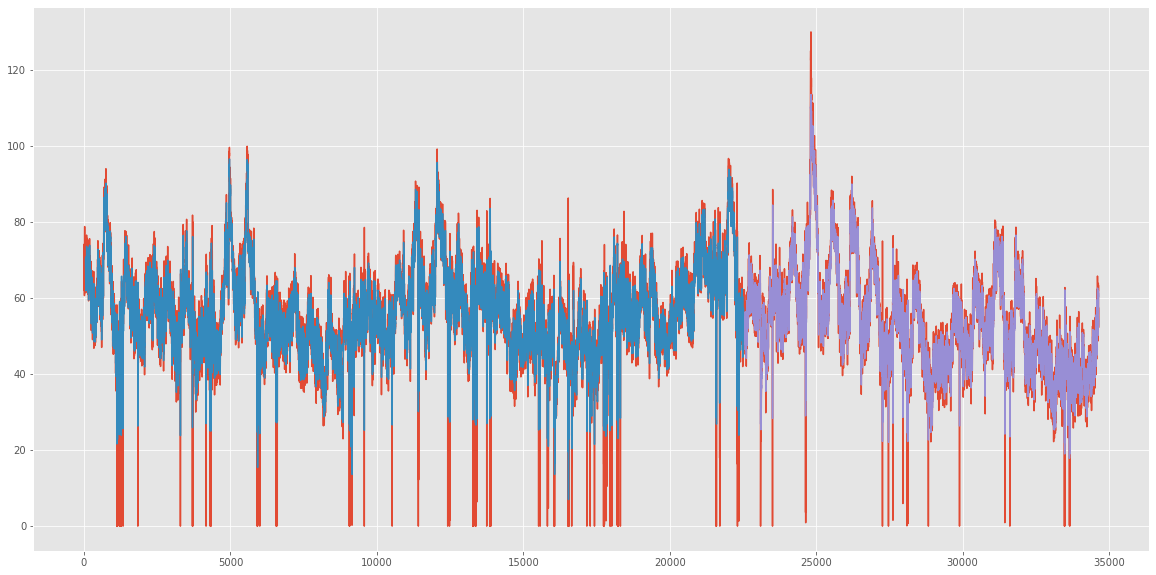

In [38]:
plt.rcParams['figure.figsize']=(20,10)
plt.style.use('ggplot')
look_back=50
trainPredictPlot = np.empty_like(df2)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df2)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df2)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df2))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

##### As it can be seen from the forecasting that the model performed well on the dataset, it is almost close to the actual value of the power consumption  